In [61]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "Pymaceuticals/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
# Read the City and Ride Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)
#print(mouse_data_df.head())
#print(clinical_data_df.head())

# Combine the data into a single dataset
merged_df = pd.merge(mouse_data_df, clinical_data_df, on="Mouse ID")

# Only want to look at Capomulin, Infubinol, Ketapril, and Placebo
merged_df = merged_df[(merged_df['Drug']=='Capomulin')|
                      (merged_df['Drug']=='Infubinol')|
                      (merged_df['Drug']=='Ketapril')|
                      (merged_df['Drug']=='Placebo')]

#print head
merged_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [62]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
group_drug_time_df = merged_df.groupby(['Drug','Timepoint'])
#print(group_drug_time_df)
tumor_volume = group_drug_time_df['Tumor Volume (mm3)'].mean()
#print(tumor_volume)

# Convert to DataFrame
tumor_volume_df = pd.DataFrame({'Tumor Volume (mm3)':tumor_volume})

# Preview DataFrame
tumor_volume_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [63]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_vol = group_drug_time_df['Tumor Volume (mm3)'].sem()
#print(std_err_vol)

# Convert to DataFrame
std_err_vol_df = pd.DataFrame({'Standard Error of Tumor Volumes':std_err_vol})

# Preview DataFrame
std_err_vol_df.head()


Standard Error of Tumor Volumes
Drug      Timepoint                                 
Capomulin 0                                 0.000000
          5                                 0.448593
          10                                0.702684
          15                                0.838617
          20                                0.909731

In [64]:
# Minor Data Munging to Re-Format the Data Frames
styled_tumorvol_df = tumor_volume_df.unstack(level=0)
styled_tumorvol_df.columns = styled_tumorvol_df.columns.get_level_values(1)
styled_stderr_df = std_err_vol_df.unstack(level=0)
styled_stderr_df.columns = styled_stderr_df.columns.get_level_values(1)

# Preview that Reformatting worked
styled_tumorvol_df
#styled_stderr_df


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


<IPython.core.display.Javascript object>


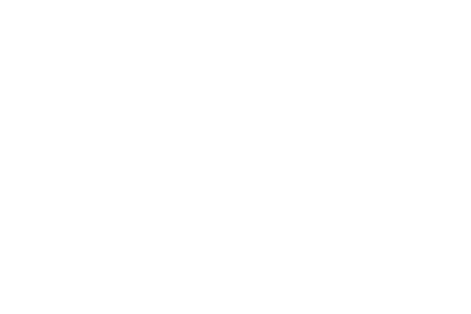

<IPython.core.display.Javascript object>


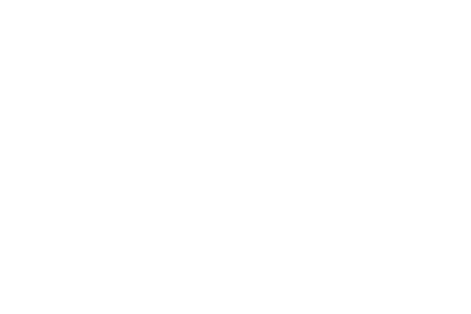

In [72]:
# Generate the Plot (with Error Bars)
#markers
markers = ['o','^','s','d']

#x values
x_value = styled_tumorvol_df.index

#y values
count = 0
for j in styled_tumorvol_df.columns:
    y_value = styled_tumorvol_df[j]
    #std error
    error = styled_stderr_df[j]
    #plot
    plt.errorbar(x_value,y_value,error,linestyle='--',marker=markers[count])
    count +=1
    
#legend
plt.legend(numpoints=1, frameon=True)

#plot format
plt.title('Tumor Volume Over Time')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Tumor Volume(mm3)')

# Save the Figure
plt.tight_layout()
plt.savefig("Pymaceuticals/Images/Tumor Volume vs Time.png")

#show plot
plt.show()

## Metastatic Response to Treatment

In [73]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
group_drug_time_df = merged_df.groupby(['Drug','Timepoint'])
#print(group_drug_time_df)
tumor_metastatic = group_drug_time_df['Metastatic Sites'].mean()
#print(tumor_volume)

# Convert to DataFrame
tumor_met_df = pd.DataFrame({'Metastatic Sites':tumor_metastatic})

# Preview DataFrame
tumor_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [74]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_err_met = group_drug_time_df['Metastatic Sites'].sem()
#print(std_err_met)

# Convert to DataFrame
std_err_met_df = pd.DataFrame({'Standard Error of Metastatic Sites':std_err_met})

# Preview DataFrame
std_err_met_df.head()


Standard Error of Metastatic Sites
Drug      Timepoint                                    
Capomulin 0                                    0.000000
          5                                    0.074833
          10                                   0.125433
          15                                   0.132048
          20                                   0.161621

In [75]:
# Minor Data Munging to Re-Format the Data Frames
styled_tumormet_df = tumor_met_df.unstack(level=0)
styled_tumormet_df.columns = styled_tumormet_df.columns.get_level_values(1)
styled_stderrmet_df = std_err_met_df.unstack(level=0)
styled_stderrmet_df.columns = styled_stderrmet_df.columns.get_level_values(1)

# Preview that Reformatting worked
styled_tumormet_df
#styled_stderr_df



Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


<IPython.core.display.Javascript object>


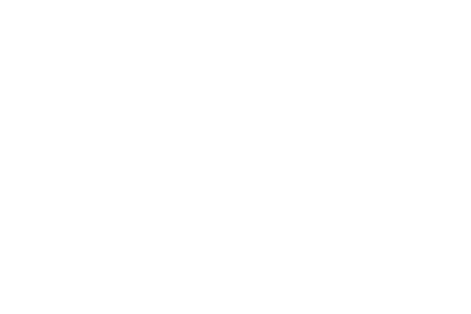

<IPython.core.display.Javascript object>


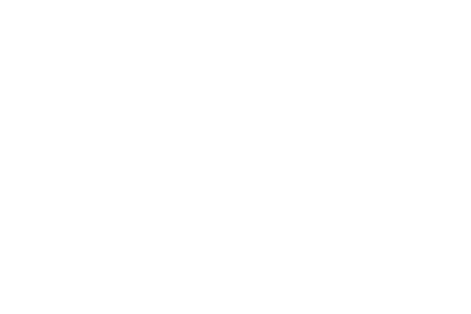

In [76]:
# Generate the Plot (with Error Bars)
#markers
markers = ['o','^','s','d']

#x values
x_value = styled_tumormet_df.index

#y values
count = 0
for j in styled_tumormet_df.columns:
    y_value = styled_tumormet_df[j]
    #std error
    error = styled_stderrmet_df[j]
    #plot
    plt.errorbar(x_value,y_value,error,linestyle='--',marker=markers[count])
    count +=1
    
#legend
plt.legend(numpoints=1, frameon=True)

#plot format
plt.title('Metastatic Spread over Time')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Metastatic Sites')

#show plot
plt.show()

# Save the Figure
plt.tight_layout()
plt.savefig("Pymaceuticals/Images/Metastatic Spread vs Time.png")


## Survival Rates

In [77]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_drug_time_df = merged_df.groupby(['Drug','Timepoint'])
#print(group_drug_time_df)
for i in group_drug_time_df:
        mouse_count = group_drug_time_df['Mouse ID'].count()
#print(tumor_volume)

# Convert to DataFrame
mouse_count_df = pd.DataFrame({'Mouse Count':mouse_count})

# Preview DataFrame
mouse_count_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [78]:
# Minor Data Munging to Re-Format the Data Frames
styled_mousecount_df = mouse_count_df.unstack(level=0)
# Preview the Data Frame
styled_mousecount_df

Mouse Count                           
Drug        Capomulin Infubinol Ketapril Placebo
Timepoint                                       
0                  25        25       25      25
5                  25        25       23      24
10                 25        21       22      24
15                 24        21       19      20
20                 23        20       19      19
25                 22        18       19      17
30                 22        17       18      15
35                 22        12       17      14
40                 21        10       15      12
45                 21         9       11      11

<IPython.core.display.Javascript object>


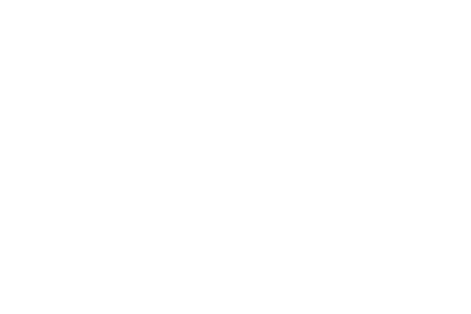

<IPython.core.display.Javascript object>


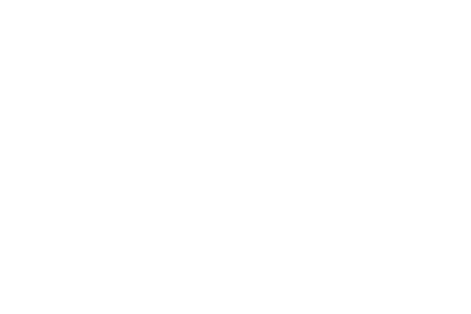

In [79]:
# Generate the Plot (Accounting for percentages)
#markers
markers = ['o','^','s','d']

#x values
x_value = styled_mousecount_df.index

#y values
count = 0
for j in styled_mousecount_df:
    y_value = styled_mousecount_df[j]/styled_mousecount_df.loc[0,j]*100
    #plot
    plt.plot(x_value,y_value,linestyle='--',marker=markers[count])
    count +=1
    
#legend
plt.legend(numpoints=1, frameon=True)

#plot format
plt.title('Survival Rate Over Time')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')

#show plot
plt.show()

# Save the Figure
plt.tight_layout()
plt.savefig("Pymaceuticals/Images/Survival Rate vs Time.png")

## Summary Bar Graph

In [80]:
# Calculate the percent changes for each drug
percent_change_tumor_vol = (styled_tumorvol_df.loc[45,:] - styled_tumorvol_df.loc[0,:])/styled_tumorvol_df.loc[0,:] * 100
percent_change_met_count = (styled_tumormet_df.loc[45,:] - styled_tumormet_df.loc[0,:])/styled_tumormet_df.loc[0,:] * 100
percent_change_mouse_count = (styled_mousecount_df.loc[45,:] - styled_mousecount_df.loc[0,:])/styled_mousecount_df.loc[0,:] * 100
# Display the data to confirm
print('Tumor Volume Percent Change')
print(percent_change_tumor_vol)
print()
print('Metastatic Spread Percent Change')
print(percent_change_met_count) #being divided by 0
print()
print('Mouse Count Percent Change')
print(percent_change_mouse_count)

Tumor Volume Percent Change
Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

Metastatic Spread Percent Change
Drug
Capomulin    inf
Infubinol    inf
Ketapril     inf
Placebo      inf
dtype: float64

Mouse Count Percent Change
             Drug     
Mouse Count  Capomulin   -16.0
             Infubinol   -64.0
             Ketapril    -56.0
             Placebo     -56.0
dtype: float64


<IPython.core.display.Javascript object>


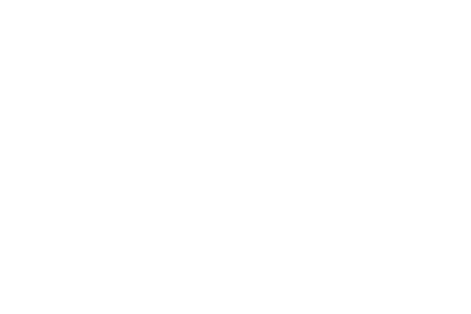

<IPython.core.display.Javascript object>


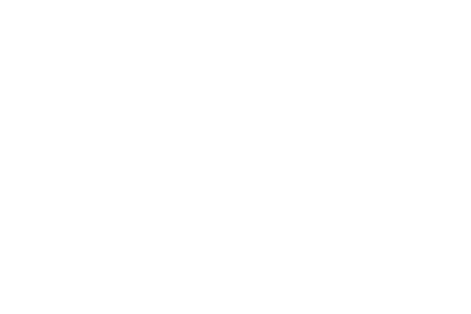

In [90]:
# Store all Relevant Percent Changes into a Tuple
# Only interested in tumor volume
tup_percentchange = (percent_change_tumor_vol)
#print(tup_percentchange)

# loop through and place value in position based on pos. or neg. value
count = 0
for i in percent_change_tumor_vol:
    if i < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(i,1))+'%',ha = 'center', color = 'white')
    count +=1
    
# plot formating 
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
xlabels = percent_change_tumor_vol.index
plt.xticks(np.arange(len(xlabels)),xlabels)
plt.axhline(y=0, color = 'black')

# bar graph percent change for tumor 
# - cond. format for passing and failing drugs
plt.bar(np.arange(4),percent_change_tumor_vol,
       color = ['red' if percent_change_tumor_vol[i] > 0 else 'green' for i in np.arange(len(xlabels))])

# Save the Figure
plt.tight_layout()
plt.savefig("Pymaceuticals/Images/Tumor Volume Percent Change.png")

# Show the Figure
plt.show()